In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('liver.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Based on chemical compounds(bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT , SGPT the outcome mentioned whether person is a patient or not.

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.drop(columns=['Age','Gender'],inplace=True)

In [6]:
print("although age and gender plays a vital role in liver health (the older you are, the more chances of you having liver problems), it makes little sense to include them in this model as the rest of the parameters are enough to classify whether a person has liver problems or not. For instance, even if your age is 20 and you are a female, if your Protein and Albumin levels are high, you'll be classified in the same category as a 65 year old man with the same values for Protein and Albumin.")

although age and gender plays a vital role in liver health (the older you are, the more chances of you having liver problems), it makes little sense to include them in this model as the rest of the parameters are enough to classify whether a person has liver problems or not. For instance, even if your age is 20 and you are a female, if your Protein and Albumin levels are high, you'll be classified in the same category as a 65 year old man with the same values for Protein and Albumin.


In [7]:
df.shape

(583, 9)

In [8]:
df.dropna(how='any',inplace=True)

In [9]:
print("Bilirubin test results are expressed as direct, indirect or total bilirubin. Total is a combination of direct and indirect bilirubin. Since, there is a relationship between total and direct bilirubin, it is wise to drop any one of the two to avoid the problem of multicollinearity.")

Bilirubin test results are expressed as direct, indirect or total bilirubin. Total is a combination of direct and indirect bilirubin. Since, there is a relationship between total and direct bilirubin, it is wise to drop any one of the two to avoid the problem of multicollinearity.


In [10]:
df.drop(columns=['Direct_Bilirubin'],inplace=True)

In [11]:
df["Dataset"]=df["Dataset"].map({1:0,2:1})

In [12]:
df['Dataset'].unique()

array([0, 1])

In [13]:
df['Dataset'].value_counts()

0    414
1    165
Name: Dataset, dtype: int64

In [14]:
target=df["Dataset"]

In [15]:
source=df.drop(["Dataset"],axis=1)

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sm=SMOTE(random_state=42)
X_res,Y_res = sm.fit_sample(source,target)

In [18]:
X_res.shape,Y_res.shape

((828, 7), (828,))

In [19]:
X_res['Dataset']=Y_res

In [20]:
X_res.head()

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.7,187,16,18,6.8,3.3,0.90,0
1,10.9,699,64,100,7.5,3.2,0.74,0
2,7.3,490,60,68,7.0,3.3,0.89,0
3,1.0,182,14,20,6.8,3.4,1.00,0
4,3.9,195,27,59,7.3,2.4,0.40,0


In [21]:
X_res['Dataset'].value_counts()

1    414
0    414
Name: Dataset, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_res.drop(columns=['Dataset']),X_res['Dataset'],test_size=0.2,random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
lr.predict(X_test)[0:5]

array([1, 0, 1, 1, 0])

In [32]:
lr.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [33]:
lr.predict_proba(X_test)[0]

array([0.25977244, 0.74022756])

In [34]:
lr.predict_proba(X_test)[:,1]

array([7.40227559e-01, 4.74480446e-01, 7.56873575e-01, 6.04275496e-01,
       3.17287071e-04, 7.03223967e-01, 5.32625586e-01, 4.87688311e-01,
       7.24632831e-01, 6.00723153e-04, 5.62114717e-02, 6.58801471e-01,
       2.27895516e-01, 4.31506130e-01, 5.32232740e-01, 6.36413551e-01,
       5.13642226e-01, 6.37598141e-01, 2.00564903e-01, 6.35446039e-01,
       1.01457225e-01, 7.24577708e-01, 2.70973434e-01, 7.62469890e-01,
       6.93715164e-01, 5.23670955e-01, 5.82888710e-01, 6.71492199e-01,
       6.15733903e-01, 7.00059966e-01, 7.31646818e-01, 7.23415079e-01,
       6.80841121e-01, 6.89237526e-01, 6.68124630e-01, 6.53216725e-01,
       7.29503660e-01, 6.66056495e-01, 5.14773831e-01, 6.98697560e-01,
       5.92687556e-01, 5.51520859e-01, 9.58959866e-04, 6.05693916e-01,
       5.13642226e-01, 6.22738281e-01, 6.78203541e-01, 1.63669151e-01,
       6.48927108e-01, 4.79982340e-01, 6.96669061e-01, 5.86793578e-01,
       7.88317534e-01, 7.67748697e-01, 5.78749031e-13, 6.32585751e-01,
      

In [35]:
lr.score(X_test,y_test)

0.6867469879518072

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
print(cross_val_score(lr,X_train,y_train,cv=8,scoring='accuracy').mean())

0.7009256538348516


In [38]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [39]:
print(confusion_matrix(y_test,lr.predict(X_test)))

[[42 41]
 [11 72]]


In [40]:
print(confusion_matrix(lr.predict(X_test),y_test))

[[42 11]
 [41 72]]


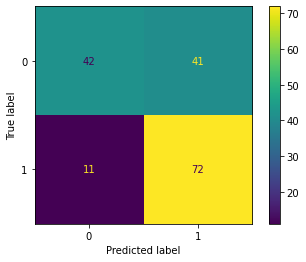

In [41]:
plot_confusion_matrix(lr.fit(X_train,y_train), X_test, y_test)

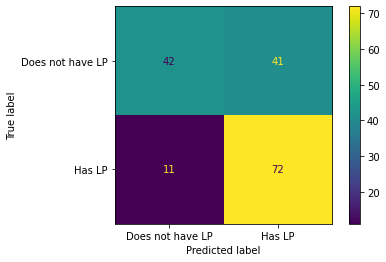

In [42]:
plot_confusion_matrix(lr.fit(X_train,y_train), X_test, y_test, display_labels=['Does not have LP','Has LP'])

In [43]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        83
           1       0.64      0.87      0.73        83

    accuracy                           0.69       166
   macro avg       0.71      0.69      0.68       166
weighted avg       0.71      0.69      0.68       166



In [44]:
print("We got a very low accuracy with logistic regression. The confusion matrix also shows that 11 people who had liver problems were wrongly classified. This can be more dangerous than wrongly classifying people who do not have any health problems as having health problems. Hence we try to minimize the occurrence of False Negative as much as possible. This can be done by changing the threshold value, which by default is 0.5 for logistic regression binary classification, to a value that gives less False Negatives. This threshod value can be computed using ROC and AUC.") 
print()
print("While our objective is to reduce False Negatives (people who were wrongly classified as not having problems inspite of having them), we must remember that in doing so we do not select a threshold value that would misclassify the True Positives.") 

We got a very low accuracy with logistic regression. The confusion matrix also shows that 11 people who had liver problems were wrongly classified. This can be more dangerous than wrongly classifying people who do not have any health problems as having health problems. Hence we try to minimize the occurrence of False Negative as much as possible. This can be done by changing the threshold value, which by default is 0.5 for logistic regression binary classification, to a value that gives less False Negatives. This threshod value can be computed using ROC and AUC.

While our objective is to reduce False Negatives (people who were wrongly classified as not having problems inspite of having them), we must remember that in doing so we do not select a threshold value that would misclassify the True Positives.


In [45]:
pred_proba_df = pd.DataFrame(lr.predict_proba(X_test))
threshold_list = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                                           y_test_pred.iloc[:,1].to_numpy().reshape(y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           y_test_pred.iloc[:,1].to_numpy().reshape(y_test_pred.iloc[:,1].to_numpy().size,1)))
    print(classification_report(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           y_test_pred.iloc[:,1].to_numpy().reshape(y_test_pred.iloc[:,1].to_numpy().size,1)))


******** For i = 0 ******
Our testing accuracy is 0.5
[[ 0 83]
 [ 0 83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.50      1.00      0.67        83

    accuracy                           0.50       166
   macro avg       0.25      0.50      0.33       166
weighted avg       0.25      0.50      0.33       166


******** For i = 0.1 ******
Our testing accuracy is 0.6144578313253012
[[19 64]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.37        83
           1       0.56      1.00      0.72        83

    accuracy                           0.61       166
   macro avg       0.78      0.61      0.55       166
weighted avg       0.78      0.61      0.55       166


******** For i = 0.2 ******
Our testing accuracy is 0.6506024096385542
[[25 58]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.30  

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [47]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

SVC(random_state=4)

In [48]:
print("Since SVM does not work with probabilities, predict_proba function is not available in the SVM model. So we use the decision function to draw ROC-AUC curve for the SVM model. The decision function returns a value that is the distance from the point to the plane of the model(SVM). The decision function gives the same value for AUC in Logistic Regression as well. However, the threshold values it returns may not to reliable. Hence, it can be used to compare algorithms, but not determine threshold.")

Since SVM does not work with probabilities, predict_proba function is not available in the SVM model. So we use the decision function to draw ROC-AUC curve for the SVM model. The decision function returns a value that is the distance from the point to the plane of the model(SVM). The decision function gives the same value for AUC in Logistic Regression as well. However, the threshold values it returns may not to reliable. Hence, it can be used to compare algorithms, but not determine threshold.


In [49]:
y_pred_svm = model_SVC.decision_function(X_test)

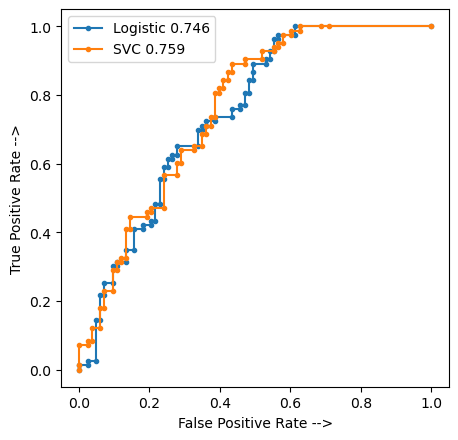

In [50]:
#ROC-AUC FOR LOGISTIC REGRESSION AND SVM

roc_auc_score_calc_log = roc_auc_score(y_test,lr.predict(X_test))

logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
SVC_fpr, SVC_tpr, SVC_threshold = roc_curve(y_test, y_pred_svm)
auc_logistic = auc(logistic_fpr, logistic_tpr)
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic %.3f'% auc_logistic)
plt.plot(SVC_fpr, SVC_tpr, marker='.', label='SVC %.3f'% auc_SVC)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

### The area under the curve for SVC is higher than area under the curve for Logistic Regression. This implies SVC performs better.

In [51]:
logistic_threshold[15],logistic_fpr[15], logistic_tpr[15]

(0.6752568507881287, 0.13253012048192772, 0.3493975903614458)

In [52]:
logistic_tpr

array([0.        , 0.01204819, 0.01204819, 0.02409639, 0.02409639,
       0.14457831, 0.14457831, 0.21686747, 0.21686747, 0.25301205,
       0.25301205, 0.30120482, 0.30120482, 0.31325301, 0.31325301,
       0.34939759, 0.34939759, 0.40963855, 0.40963855, 0.42168675,
       0.42168675, 0.43373494, 0.43373494, 0.48192771, 0.48192771,
       0.55421687, 0.55421687, 0.59036145, 0.59036145, 0.61445783,
       0.61445783, 0.62650602, 0.62650602, 0.65060241, 0.65060241,
       0.69879518, 0.69879518, 0.71084337, 0.71084337, 0.72289157,
       0.72289157, 0.73493976, 0.73493976, 0.75903614, 0.75903614,
       0.77108434, 0.77108434, 0.80722892, 0.80722892, 0.84337349,
       0.84337349, 0.86746988, 0.89156627, 0.89156627, 0.90361446,
       0.90361446, 0.92771084, 0.92771084, 0.96385542, 0.96385542,
       0.97590361, 0.97590361, 1.        , 1.        ])

In [53]:
logistic_tpr.tolist().index(0.8674698795180723)

51

In [54]:
logistic_threshold[51]

0.5136422261528462

In [55]:
logistic_fpr[51]

0.4939759036144578

In [56]:
np.where(logistic_tpr==.8674698795180723)

(array([51]),)

In [57]:
print("The above implies that for a threshold value of 0.5136422261528465, the corresponding tpr/recall is 0.8674698795180723  and false positive rate is 0.4939759036144578. The calculation is done by considering Has LP - Has LP as true value.") 

print("If you want threshold, fpr, tpr values for 0 i.e. does not have LP, use lr.predict_proba(X_test)[:,0] while calculating threshold,trp and fpr values instead.")  

The above implies that for a threshold value of 0.5136422261528465, the corresponding tpr/recall is 0.8674698795180723  and false positive rate is 0.4939759036144578. The calculation is done by considering Has LP - Has LP as true value.
If you want threshold, fpr, tpr values for 0 i.e. does not have LP, use lr.predict_proba(X_test)[:,0] while calculating threshold,trp and fpr values instead.


In [58]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [59]:
target=X_res["Dataset"]
source=X_res.drop(["Dataset"],axis=1)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(source,target,test_size=0.2,random_state=1)

In [61]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
model.score(X_test,y_test)

0.7710843373493976

In [63]:
print(cross_val_score(model,X_train,y_train,cv=8,scoring='accuracy').mean())

0.7281442844548927


In [64]:
# import pickle
# pickle.dump(model,open('model_liver.pkl','wb'))